In [1]:
import acquire_zillow
import prepare_zillow
import explore_zillow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, ttest_ind, chisquare
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = acquire_zillow.merge_zillow()

In [3]:
df.shape

(167888, 77)

In [4]:
df = acquire_zillow.drop_columns(df)

In [5]:
df.columns

Index(['id', 'parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxd

In [6]:
df = acquire_zillow.remove_duplicates(df)

In [7]:
df = prepare_zillow.prep_data(df)

In [8]:
df.shape

(158758, 59)

In [9]:
prepare_zillow.percent_missing(df)

id                                0.000000
parcelid                          0.000000
basementsqft                     99.942050
bathroomcnt                       0.000000
bedroomcnt                        0.000000
calculatedbathnbr                 0.020156
finishedfloor1squarefeet         91.920407
calculatedfinishedsquarefeet      0.000000
finishedsquarefeet12              0.219202
finishedsquarefeet13             99.982363
finishedsquarefeet15             99.993701
finishedsquarefeet50             91.920407
finishedsquarefeet6              99.804734
fips                              0.000000
fireplacecnt                     88.784187
fullbathcnt                       0.020156
garagecarcnt                     65.380642
garagetotalsqft                  65.380642
hashottuborspa                   97.545950
latitude                          0.000000
longitude                         0.000000
lotsizesquarefeet                11.223371
poolcnt                          78.743748
poolsizesum

In [10]:
df['fips'] = df['fips'].astype(str)

In [11]:
df = prepare_zillow.make_non_numeric(df)

In [12]:
df.dtypes

id                               object
parcelid                         object
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                             object
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid10                    float64


In [13]:
need_zeros= ['airconditioningdesc', 'heatingorsystemdesc', 'taxamount', 'structuretaxvaluedollarcnt', 'propertyzoningdesc', 'finishedsquarefeet12', 'calculatedfinishedsquarefeet']


In [14]:
prepare_zillow.fill_with_zeros(df, need_zeros)

,id,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,2931667,11016594,NaN,2.0,3.0,2.0,NaN,1684.0,1684.0,NaN,...,60371066461001.0,0.027600,2016-01-01,Central,None,None,Central,Single Family Residential,None,None
1,475764,14366692,NaN,3.5,4.0,3.5,NaN,2263.0,2263.0,NaN,...,nan,-0.168400,2016-01-01,0,None,None,0,Single Family Residential,None,None
2,2444575,12098116,NaN,3.0,2.0,3.0,NaN,2217.0,2217.0,NaN,...,60374638003004.0,-0.004000,2016-01-01,Central,None,None,Central,Single Family Residential,None,None
3,1584730,12643413,NaN,2.0,2.0,2.0,NaN,839.0,839.0,NaN,...,60372963002002.0,0.021800,2016-01-02,Central,None,None,Central,Condominium,None,None
4,2926916,14432541,NaN,2.5,4.0,2.5,NaN,2283.0,2283.0,NaN,...,60590423381006.0,-0.005000,2016-01-02,0,None,None,0,Single Family Residential,None,None
5,2843942,11509835,NaN,4.0,4.0,4.0,NaN,3067.0,3067.0,NaN,...,60376210044006.0,-0.270500,2016-01-02,Central,None,None,Central,Single Family Residential,None,None
6,1628001,12286022,NaN,1.0,2.0,1.0,NaN,1297.0,1297.0,NaN,...,60375416053007.0,0.044000,2016-01-02,0,None,None,Floor/Wall,Single Family Residential,None,None
7,2543293,17177301,NaN,2.5,3.0,2.5,853.0,1763.0,1763.0,NaN,...,61110031002073.0,0.163800,2016-01-02,0,None,None,0,Condominium,None,None
8,519006,14739064,NaN,1.0,2.0,1.0,NaN,796.0,796.0,NaN,...,60590423151018.0,-0.003000,2016-01-02,0,None,None,0,Condominium,None,None
9,1604540,14677559,NaN,2.0,2.0,2.0,NaN,1260.0,1260.0,NaN,...,60590626483015.0,0.084300,2016-01-03,0,None,None,0,Condominium,None,None


In [15]:
prepare_zillow.handle_missing_values(df)

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
0,2931667,11016594,2.0,3.0,2.0,1684.0,1684.0,6037.0,2.0,34280990.0,...,2015.0,237416.0,6735.88,nan,60371066461001.0,0.027600,2016-01-01,Central,Central,Single Family Residential
1,475764,14366692,3.5,4.0,3.5,2263.0,2263.0,6059.0,3.0,33668120.0,...,2015.0,239071.0,10153.02,nan,nan,-0.168400,2016-01-01,0,0,Single Family Residential
2,2444575,12098116,3.0,2.0,3.0,2217.0,2217.0,6037.0,3.0,34136312.0,...,2015.0,57912.0,11484.48,nan,60374638003004.0,-0.004000,2016-01-01,Central,Central,Single Family Residential
3,1584730,12643413,2.0,2.0,2.0,839.0,839.0,6037.0,2.0,33755800.0,...,2015.0,73362.0,3048.74,nan,60372963002002.0,0.021800,2016-01-02,Central,Central,Condominium
4,2926916,14432541,2.5,4.0,2.5,2283.0,2283.0,6059.0,2.0,33485643.0,...,2015.0,264977.0,5488.96,nan,60590423381006.0,-0.005000,2016-01-02,0,0,Single Family Residential
5,2843942,11509835,4.0,4.0,4.0,3067.0,3067.0,6037.0,4.0,33870089.0,...,2015.0,1567301.0,27126.57,nan,60376210044006.0,-0.270500,2016-01-02,Central,Central,Single Family Residential
6,1628001,12286022,1.0,2.0,1.0,1297.0,1297.0,6037.0,1.0,33899475.0,...,2015.0,46972.0,2304.97,nan,60375416053007.0,0.044000,2016-01-02,0,Floor/Wall,Single Family Residential
7,2543293,17177301,2.5,3.0,2.5,1763.0,1763.0,6111.0,2.0,34207204.0,...,2015.0,199000.0,3745.50,nan,61110031002073.0,0.163800,2016-01-02,0,0,Condominium
8,519006,14739064,1.0,2.0,1.0,796.0,796.0,6059.0,1.0,33549600.0,...,2015.0,143230.0,2172.88,nan,60590423151018.0,-0.003000,2016-01-02,0,0,Condominium
9,1604540,14677559,2.0,2.0,2.0,1260.0,1260.0,6059.0,2.0,33612700.0,...,2015.0,80983.0,1940.26,nan,60590626483015.0,0.084300,2016-01-03,0,0,Condominium


In [16]:
df.shape

(158758, 34)

In [17]:
df.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,158758.000000,158758.000000,158726.000000,158758.000000,158758.000000,158726.000000,1.587580e+05,1.587580e+05,1.409400e+05,158700.000000,158758.000000,101165.0,158688.000000,1.587580e+05,1.587560e+05,158758.000000,1.587560e+05,158758.000000,158758.000000
mean,2.285743,3.022613,2.285706,1755.681673,1752.781857,2.215440,3.400705e+07,-1.181982e+08,3.020067e+04,96601.280618,1.557477,1.0,1969.812979,1.849253e+05,4.737784e+05,2015.463378,2.888508e+05,5981.411817,0.013755
std,0.940556,0.994808,0.940543,917.855236,920.376529,0.924168,2.687182e+05,3.646259e+05,1.233577e+05,3749.804278,2.876210,0.0,23.047110,2.177048e+05,5.918296e+05,0.498659,4.298462e+05,7068.303201,0.159193
min,1.000000,1.000000,1.000000,501.000000,0.000000,1.000000,3.333930e+07,-1.194754e+08,1.670000e+02,95982.000000,0.000000,1.0,1878.000000,0.000000e+00,2.200000e+01,2015.000000,2.200000e+01,0.000000,-4.655420
25%,2.000000,2.000000,2.000000,1175.000000,1174.000000,2.000000,3.380820e+07,-1.184204e+08,5.750000e+03,96210.000000,0.000000,1.0,1954.000000,8.309625e+04,2.037545e+05,2015.000000,8.354750e+04,2800.452500,-0.024275
50%,2.000000,3.000000,2.000000,1522.000000,1521.000000,2.000000,3.402270e+07,-1.181651e+08,7.247000e+03,96403.000000,0.000000,1.0,1971.000000,1.344635e+05,3.513245e+05,2015.000000,1.986940e+05,4497.940000,0.006000
75%,3.000000,4.000000,3.000000,2067.000000,2065.000000,3.000000,3.417684e+07,-1.179146e+08,1.214425e+04,96987.000000,0.000000,1.0,1987.000000,2.144210e+05,5.548865e+05,2016.000000,3.563162e+05,6900.105000,0.038270
max,15.000000,16.000000,15.000000,21929.000000,21929.000000,15.000000,3.481877e+07,-1.175546e+08,6.971010e+06,399675.000000,18.000000,1.0,2016.000000,9.948100e+06,2.775000e+07,2016.000000,2.450000e+07,321936.090000,5.262999


In [18]:
prepare_zillow.percent_missing(df)

id                               0.000000
parcelid                         0.000000
bathroomcnt                      0.000000
bedroomcnt                       0.000000
calculatedbathnbr                0.020156
calculatedfinishedsquarefeet     0.000000
finishedsquarefeet12             0.000000
fips                             0.000000
fullbathcnt                      0.020156
latitude                         0.000000
longitude                        0.000000
lotsizesquarefeet               11.223371
propertycountylandusecode        0.000000
propertyzoningdesc               0.000000
rawcensustractandblock           0.000000
regionidcity                     0.000000
regionidcounty                   0.000000
regionidneighborhood             0.000000
regionidzip                      0.036534
roomcnt                          0.000000
unitcnt                         36.277227
yearbuilt                        0.044092
structuretaxvaluedollarcnt       0.000000
taxvaluedollarcnt                0

In [19]:
#drop columns that don't seem valuable
df = df.drop(columns=(['id', 'finishedsquarefeet12', 'fullbathcnt', 'regionidcity', 'regionidneighborhood', 'roomcnt', 'unitcnt', 'structuretaxvaluedollarcnt', 'taxdelinquencyyear', 'censustractandblock', 'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc']))


In [20]:
df.dtypes

parcelid                         object
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
fips                             object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertyzoningdesc               object
rawcensustractandblock           object
regionidcounty                   object
regionidzip                     float64
yearbuilt                       float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
logerror                        float64
transactiondate                  object
dtype: object

In [21]:
numeric_df = df.select_dtypes('float64')
categorical_df = df.select_dtypes('object')

In [22]:
numeric_df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
0,2.0,3.0,2.0,1684.0,34280990.0,-118488536.0,7528.0,96370.0,1959.0,360170.0,2015.0,237416.0,6735.88,0.0276
1,3.5,4.0,3.5,2263.0,33668120.0,-117677556.0,3643.0,96962.0,2014.0,585529.0,2015.0,239071.0,10153.02,-0.1684
2,3.0,2.0,3.0,2217.0,34136312.0,-118175032.0,11423.0,96293.0,1940.0,119906.0,2015.0,57912.0,11484.48,-0.0040
3,2.0,2.0,2.0,839.0,33755800.0,-118309000.0,70859.0,96222.0,1987.0,244880.0,2015.0,73362.0,3048.74,0.0218
4,2.5,4.0,2.5,2283.0,33485643.0,-117700234.0,6000.0,96961.0,1981.0,434551.0,2015.0,264977.0,5488.96,-0.0050


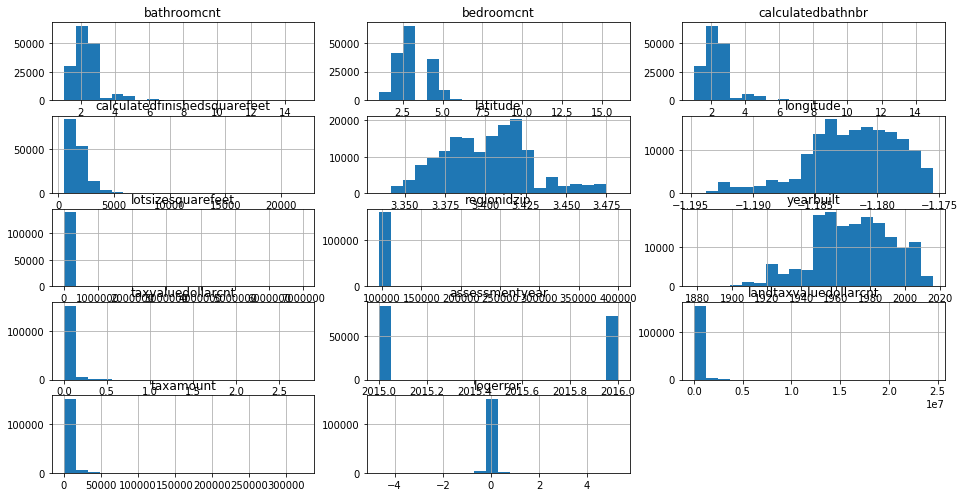

In [23]:
explore_zillow.make_hist(numeric_df)

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


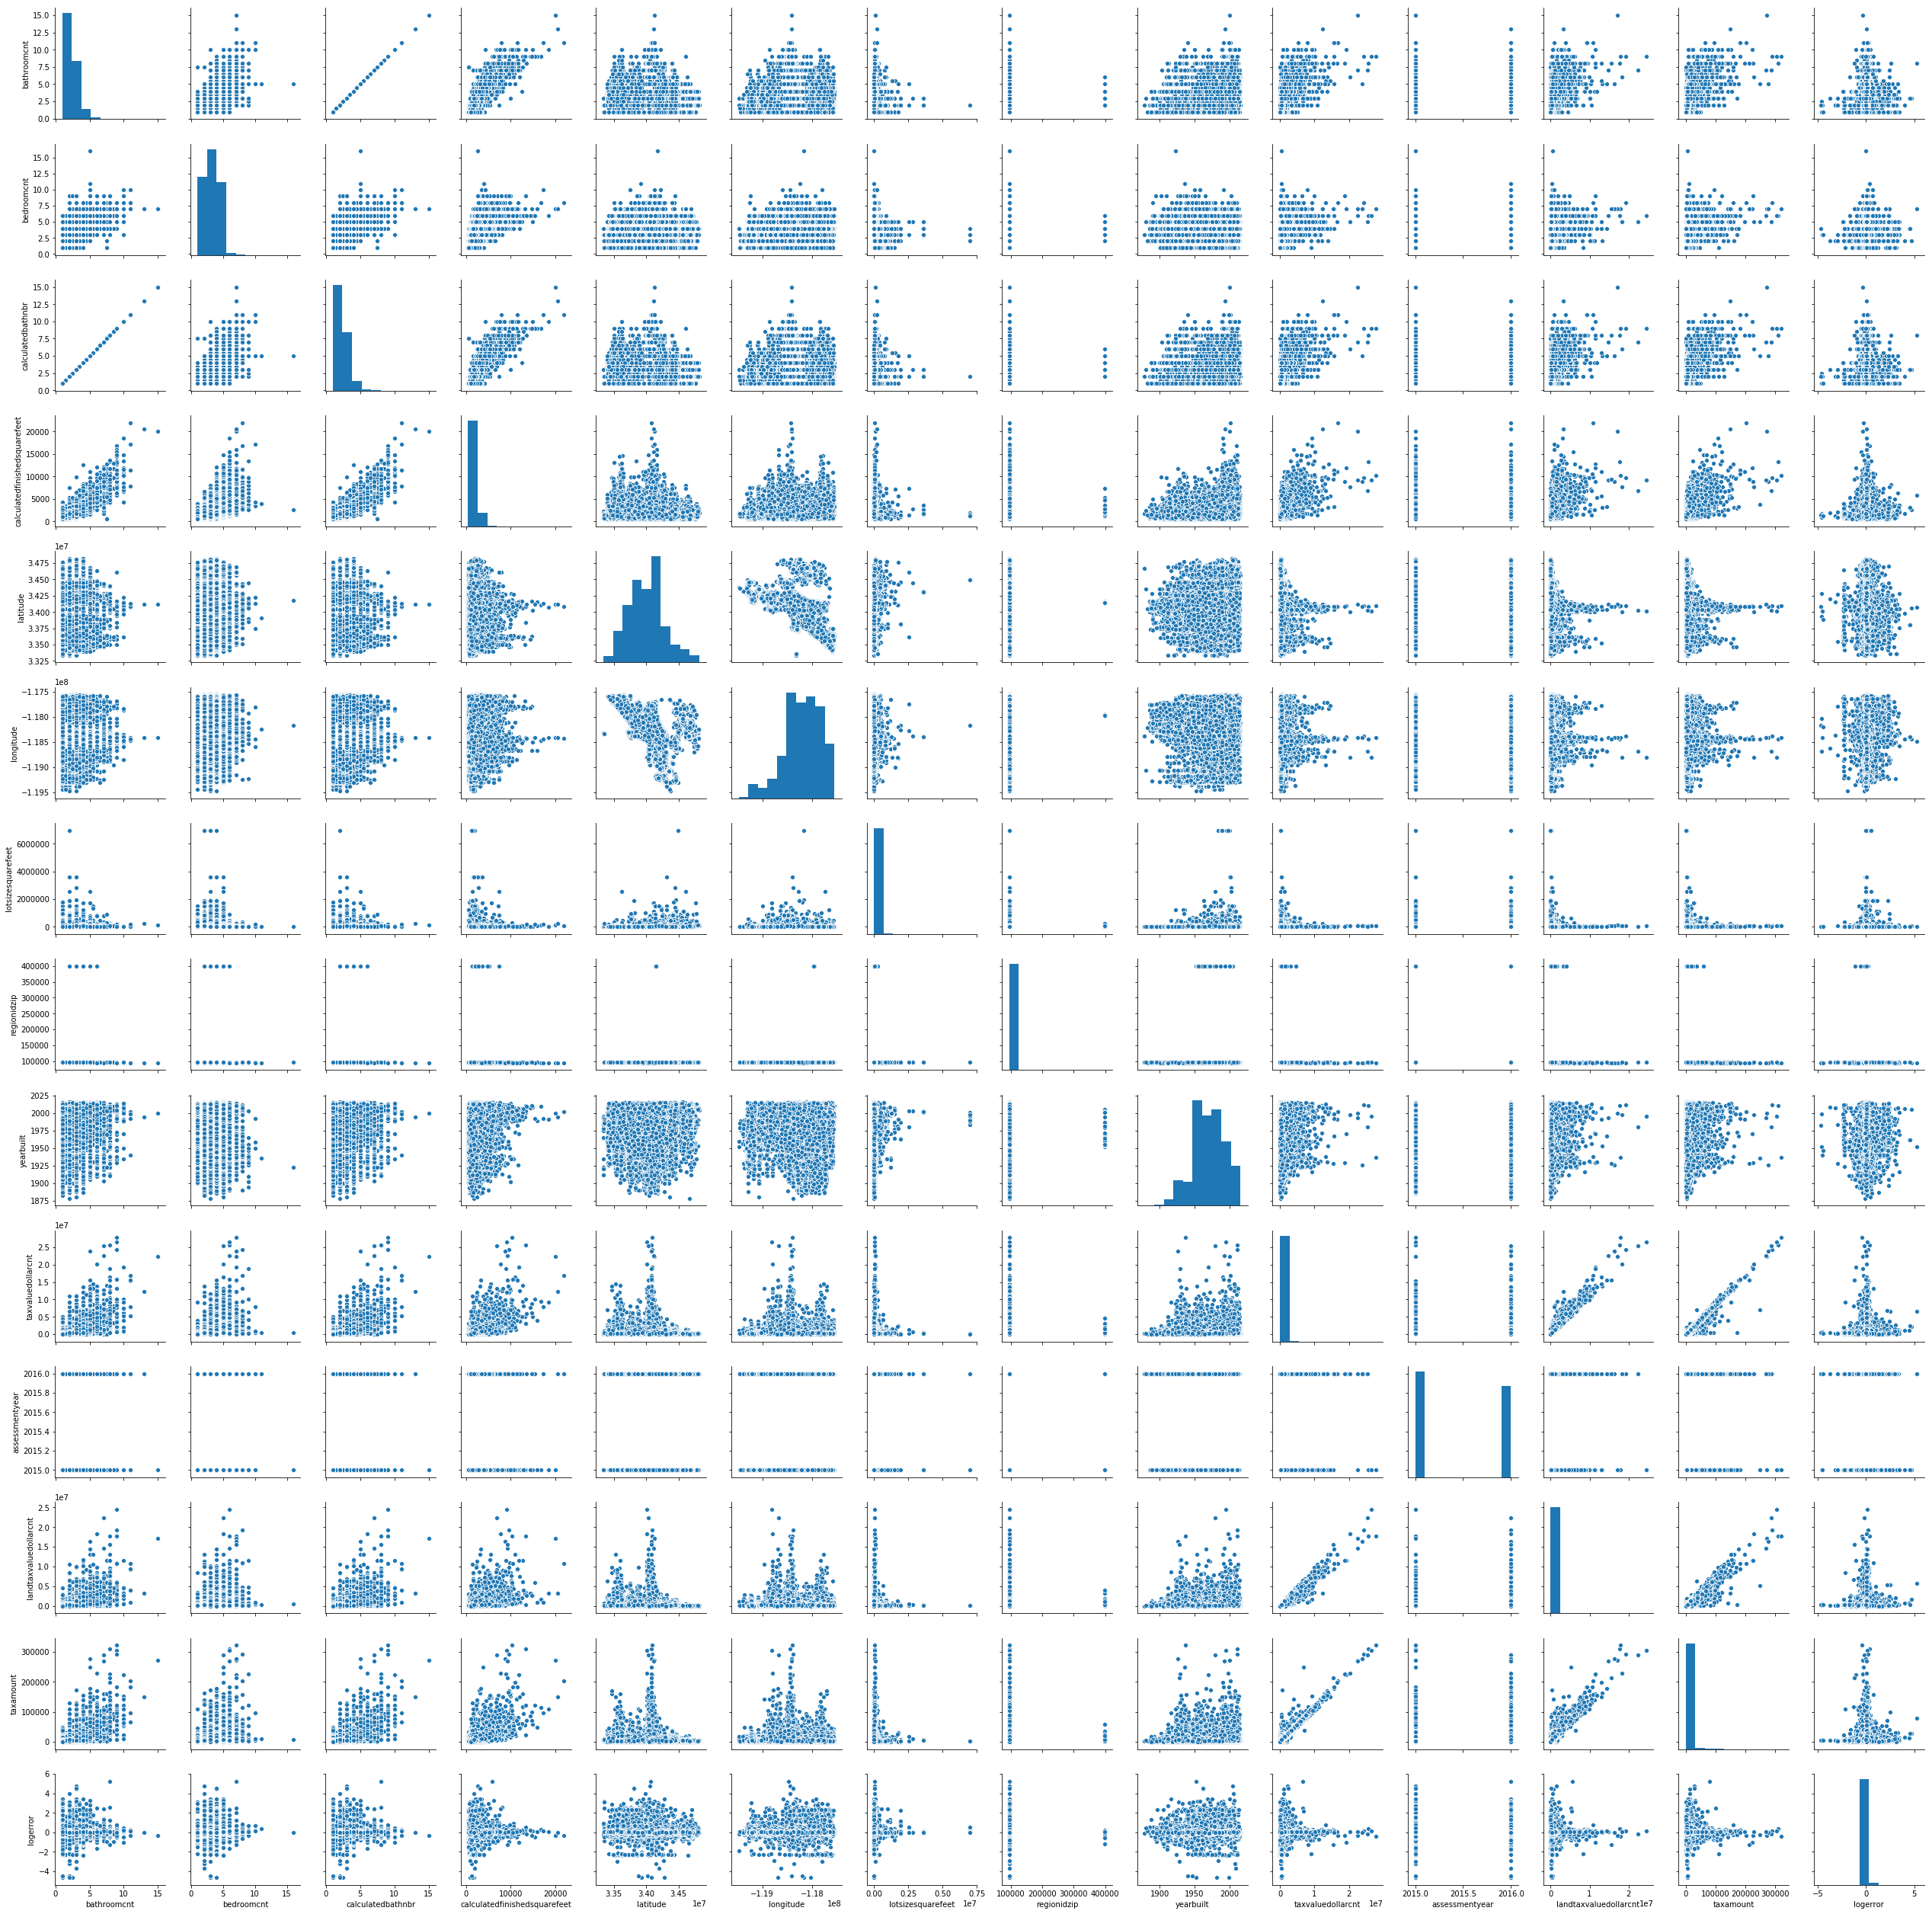

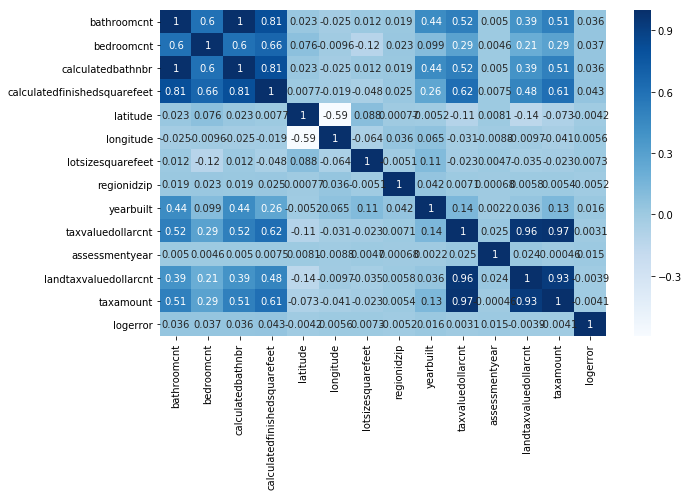

In [24]:
explore_zillow.make_pair_heat(numeric_df)

In [ ]:
# explore_zillow.make_box(numeric_df)

In [ ]:
# explore_zillow.make_jointplot(numeric_df)

In [27]:
#creating column for new room count
df = df.assign(rmcount=df.bathroomcnt+df.bedroomcnt)

In [28]:
#creating column for value per square foot
df = df.assign(value_per_sq_ft=df.taxvaluedollarcnt/df.calculatedfinishedsquarefeet)
df = df.drop(df[(df.value_per_sq_ft).isnull()].index)
df = df.drop(df[(df.value_per_sq_ft > 7000)].index)
df.sort_values(['value_per_sq_ft'], ascending=True).head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,rmcount,value_per_sq_ft
25390,12431927,2.0,2.0,2.0,883.0,6037.0,33833300.0,-118076000.0,NaN,010E,...,96216.0,1973.0,22.0,2015.0,22.0,2409.92,-0.071500,2016-04-14,4.0,0.024915
62085,11137835,4.0,3.0,4.0,3284.0,6037.0,34363313.0,-118542860.0,55926.0,0101,...,96352.0,1985.0,1000.0,2016.0,1000.0,816.49,-0.102919,2017-07-28,7.0,0.304507
73360,10864766,3.0,3.0,3.0,2490.0,6037.0,34138839.0,-118460871.0,53260.0,0101,...,96412.0,1965.0,13352.0,2016.0,161.0,6591.18,0.100271,2017-09-01,6.0,5.362249
22001,12230315,1.0,2.0,1.0,589.0,6037.0,33936504.0,-118236291.0,3249.0,0100,...,96040.0,1955.0,3254.0,2016.0,2250.0,295.06,0.074444,2017-03-30,3.0,5.524618
62953,12877292,2.0,3.0,2.0,1363.0,6037.0,34041754.0,-117730851.0,8028.0,0100,...,96506.0,1901.0,11122.0,2015.0,6640.0,440.47,0.023700,2016-08-03,5.0,8.159941


In [29]:
#creating column for age of property
df = df.drop(df[(df.yearbuilt).isnull()].index)
df = df.assign(age_of_property=2018-df.yearbuilt)
df.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,rmcount,value_per_sq_ft,age_of_property
count,158616.000000,158616.000000,158587.000000,158616.000000,1.586160e+05,1.586160e+05,1.408100e+05,158563.000000,158616.000000,1.586160e+05,158616.000000,1.586160e+05,158616.000000,158616.000000,158616.000000,158616.000000,158616.000000
mean,2.285671,3.022507,2.285638,1755.443448,3.400700e+07,-1.181980e+08,3.018025e+04,96601.291342,1969.812774,4.737403e+05,2015.463352,2.888266e+05,5981.213357,0.013755,5.308178,260.745509,48.187226
std,0.940253,0.994635,0.940252,917.429068,2.687224e+05,3.644661e+05,1.232247e+05,3751.401770,23.047162,5.913514e+05,0.498657,4.291659e+05,7062.928928,0.159152,1.728162,187.847339,23.047162
min,1.000000,1.000000,1.000000,501.000000,3.333930e+07,-1.194754e+08,1.670000e+02,95982.000000,1878.000000,2.200000e+01,2015.000000,2.200000e+01,0.000000,-4.655420,2.000000,0.024915,2.000000
25%,2.000000,2.000000,2.000000,1175.000000,3.380809e+07,-1.184201e+08,5.750000e+03,96210.000000,1954.000000,2.037885e+05,2015.000000,8.357000e+04,2801.127500,-0.024245,4.000000,145.911413,31.000000
50%,2.000000,3.000000,2.000000,1522.000000,3.402261e+07,-1.181650e+08,7.246000e+03,96403.000000,1971.000000,3.513460e+05,2015.000000,1.987025e+05,4498.190000,0.006000,5.000000,236.244982,47.000000
75%,3.000000,4.000000,3.000000,2066.000000,3.417680e+07,-1.179145e+08,1.213875e+04,96987.000000,1987.000000,5.548790e+05,2016.000000,3.563610e+05,6900.690000,0.038297,6.000000,332.656385,64.000000
max,15.000000,16.000000,15.000000,21929.000000,3.481877e+07,-1.175546e+08,6.971010e+06,399675.000000,2016.000000,2.775000e+07,2016.000000,2.450000e+07,321936.090000,5.262999,22.000000,6057.834259,140.000000


In [30]:
df.head().T

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
calculatedbathnbr,2,3.5,3,2,2.5
calculatedfinishedsquarefeet,1684,2263,2217,839,2283
fips,6037.0,6059.0,6037.0,6037.0,6059.0
latitude,3.4281e+07,3.36681e+07,3.41363e+07,3.37558e+07,3.34856e+07
longitude,-1.18489e+08,-1.17678e+08,-1.18175e+08,-1.18309e+08,-1.177e+08
lotsizesquarefeet,7528,3643,11423,70859,6000
propertycountylandusecode,0100,1,0100,010C,122


In [31]:
#creating column for lot value per square foot
df = df.assign(lot_value_per_sq_ft=df.taxvaluedollarcnt/df.lotsizesquarefeet)
df.sort_values(['lot_value_per_sq_ft'], ascending=False).head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,rmcount,value_per_sq_ft,age_of_property,lot_value_per_sq_ft
31594,11513448,6.0,5.0,6.0,3540.0,6037.0,33859142.0,-118399597.0,2435.0,0110,...,8000000.0,2016.0,4584000.0,83955.53,0.074126,2017-05-01,11.0,2259.887006,65.0,3285.420945
19987,11508591,3.0,3.0,3.0,2234.0,6037.0,33877631.0,-118407178.0,3330.0,0100,...,9837579.0,2016.0,9837579.0,107847.59,-0.392169,2017-03-24,6.0,4403.571620,87.0,2954.227928
74300,11505743,6.0,5.0,6.0,5483.0,6037.0,33899076.0,-118417998.0,3516.0,0110,...,9523337.0,2016.0,4899730.0,104642.64,-0.181989,2017-09-07,11.0,1736.884370,15.0,2708.571388
16143,14420200,2.5,2.0,2.5,1748.0,6059.0,33516858.0,-117759921.0,930.0,1,...,2350000.0,2015.0,2250388.0,24986.46,-0.487800,2016-03-14,4.5,1344.393593,54.0,2526.881720
48834,17188308,3.5,4.0,3.5,1920.0,6111.0,34212188.0,-119021721.0,167.0,1129,...,420000.0,2015.0,211000.0,4472.86,0.087100,2016-06-23,7.5,218.750000,13.0,2514.970060


In [32]:
df.propertycountylandusecode.unique()

array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
       '0101', '0700', '1111', '01DC', '010D', '1110', '012C', '01HC',
       '010G', '010F', '0103', '1116', '0111', '010M', '0108', '0109',
       '010H', '010V', '0102', '012D', '105', '0110', '0130', '0114',
       '012E', '1117', '070D', '010', '0400', '0131', '01HE', '0113',
       '0133', '1120', '0105', '0141', '1112'], dtype=object)

In [33]:
df.regionidcounty.value_counts()

3101.0    101437
1286.0     44212
2061.0     12967
Name: regionidcounty, dtype: int64

In [34]:
#TTEST
stats.ttest_ind(df[df.lot_value_per_sq_ft <= 60].logerror,
               df[df.lot_value_per_sq_ft > 60].logerror)

Ttest_indResult(statistic=4.230776568912713, pvalue=2.3303293825241173e-05)

In [35]:
stats.ttest_ind(df[df.lot_value_per_sq_ft <= 40].logerror,
               df[df.lot_value_per_sq_ft > 40].logerror)

Ttest_indResult(statistic=4.80050153069921, pvalue=1.5843080429837737e-06)

In [36]:
stats.ttest_ind(df[df.assessmentyear == 2015].logerror,
               df[df.assessmentyear == 2016].logerror)

Ttest_indResult(statistic=-6.211142197935688, pvalue=5.273070299511365e-10)

In [37]:
stats.ttest_ind(df[df.age_of_property <= 10].logerror,
               df[df.age_of_property > 10].logerror)

Ttest_indResult(statistic=-1.3836400449369046, pvalue=0.1664706473036497)

In [38]:
#CHI SQUARE TEST

### CLUSTERING

### Logerror only

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


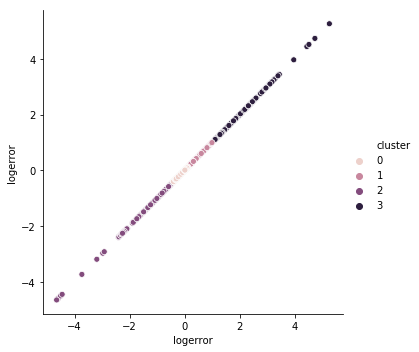

In [44]:
X = df[['logerror']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='logerror', y='logerror', hue='cluster')

In [40]:
X.cluster.value_counts()

1    149610
0      7964
3       676
2       366
Name: cluster, dtype: int64

In [41]:
X = df[['logerror']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

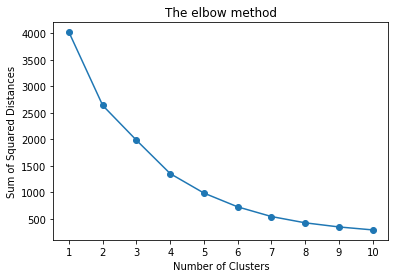

In [42]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

In [45]:
#assigned predictions to dataframe
df = df.assign(cluster_target=X['cluster'])

In [46]:
df.head().T

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
calculatedbathnbr,2,3.5,3,2,2.5
calculatedfinishedsquarefeet,1684,2263,2217,839,2283
fips,6037.0,6059.0,6037.0,6037.0,6059.0
latitude,3.4281e+07,3.36681e+07,3.41363e+07,3.37558e+07,3.34856e+07
longitude,-1.18489e+08,-1.17678e+08,-1.18175e+08,-1.18309e+08,-1.177e+08
lotsizesquarefeet,7528,3643,11423,70859,6000
propertycountylandusecode,0100,1,0100,010C,122


In [ ]:
#Swarmplot
# sns.swarmplot(x="latitude", y="longitude", data=df, hue="cluster_target", palette="Set2")
# ax = sns.boxplot(x="latitude", y="longitude", data=df,
#         showcaps=True,boxprops={'facecolor':'None'},
#         showfliers=True,whiskerprops={'linewidth':0})

### LAT/LONG

In [47]:
X = df[['latitude', 'longitude']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

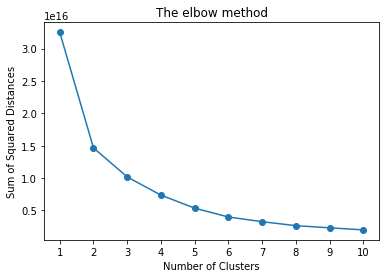

In [48]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


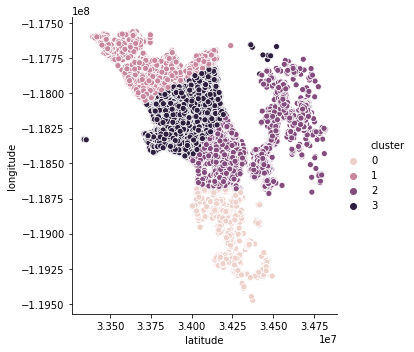

In [49]:
X = df[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='latitude', y='longitude', hue='cluster')

In [50]:
df = df.assign(cluster_location=X['cluster'])

In [51]:
stats.ttest_ind(df[df.cluster_location <= 1].logerror,
               df[df.cluster_location > 1].logerror)

Ttest_indResult(statistic=5.121227290016529, pvalue=3.0390749702862797e-07)

In [52]:
location_dummy = pd.get_dummies(df['cluster_location'])

In [63]:
df2 = pd.concat([df, location_dummy], axis=1)

In [66]:
df2.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,rmcount,value_per_sq_ft,age_of_property,lot_value_per_sq_ft,cluster_target,cluster_location,0,1,2,3
0,11016594,2.0,3.0,2.0,1684.0,6037.0,34280990.0,-118488536.0,7528.0,0100,...,5.0,213.877672,59.0,47.844049,0,2,0,0,1,0
1,14366692,3.5,4.0,3.5,2263.0,6059.0,33668120.0,-117677556.0,3643.0,1,...,7.5,258.740168,4.0,160.727148,0,1,0,1,0,0
2,12098116,3.0,2.0,3.0,2217.0,6037.0,34136312.0,-118175032.0,11423.0,0100,...,5.0,54.084799,78.0,10.496892,0,3,0,0,0,1
3,12643413,2.0,2.0,2.0,839.0,6037.0,33755800.0,-118309000.0,70859.0,010C,...,4.0,291.871275,31.0,3.455877,0,3,0,0,0,1
4,14432541,2.5,4.0,2.5,2283.0,6059.0,33485643.0,-117700234.0,6000.0,122,...,6.5,190.342094,37.0,72.425167,0,1,0,1,0,0


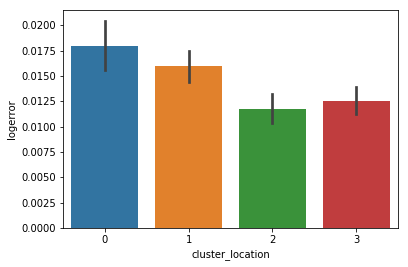

In [70]:
ax = sns.barplot(x="cluster_location", y="logerror", data=df2)

### AGE/VALUE

In [54]:
X = df[['age_of_property','value_per_sq_ft']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

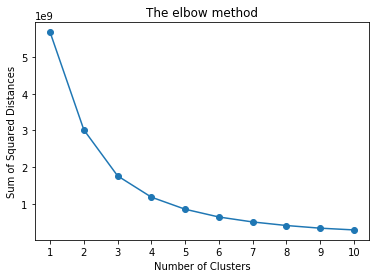

In [55]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


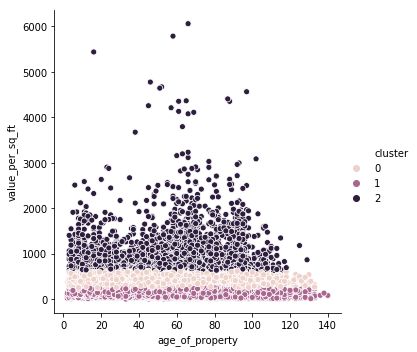

In [56]:
X = df[['age_of_property','value_per_sq_ft']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='age_of_property', y='value_per_sq_ft', hue='cluster')

### SQFT/VALUE

In [57]:
prepare_zillow.fill_with_zeros(df, 'lotsizesquarefeet')

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,rmcount,value_per_sq_ft,age_of_property,lot_value_per_sq_ft,cluster_target,cluster_location
0,11016594,2.0,3.0,2.0,1684.0,6037.0,34280990.0,-118488536.0,7528.0,0100,...,237416.0,6735.88,0.027600,2016-01-01,5.0,213.877672,59.0,47.844049,0,2
1,14366692,3.5,4.0,3.5,2263.0,6059.0,33668120.0,-117677556.0,3643.0,1,...,239071.0,10153.02,-0.168400,2016-01-01,7.5,258.740168,4.0,160.727148,0,1
2,12098116,3.0,2.0,3.0,2217.0,6037.0,34136312.0,-118175032.0,11423.0,0100,...,57912.0,11484.48,-0.004000,2016-01-01,5.0,54.084799,78.0,10.496892,0,3
3,12643413,2.0,2.0,2.0,839.0,6037.0,33755800.0,-118309000.0,70859.0,010C,...,73362.0,3048.74,0.021800,2016-01-02,4.0,291.871275,31.0,3.455877,0,3
4,14432541,2.5,4.0,2.5,2283.0,6059.0,33485643.0,-117700234.0,6000.0,122,...,264977.0,5488.96,-0.005000,2016-01-02,6.5,190.342094,37.0,72.425167,0,1
5,11509835,4.0,4.0,4.0,3067.0,6037.0,33870089.0,-118402768.0,2708.0,0100,...,1567301.0,27126.57,-0.270500,2016-01-02,8.0,798.158135,36.0,903.970089,0,3
6,12286022,1.0,2.0,1.0,1297.0,6037.0,33899475.0,-118212720.0,6677.0,0100,...,46972.0,2304.97,0.044000,2016-01-02,3.0,85.983809,79.0,16.702261,0,3
7,17177301,2.5,3.0,2.5,1763.0,6111.0,34207204.0,-119165589.0,0.0,1129,...,199000.0,3745.50,0.163800,2016-01-02,5.5,173.567782,24.0,NaN,1,0
8,14739064,1.0,2.0,1.0,796.0,6059.0,33549600.0,-117678000.0,0.0,34,...,143230.0,2172.88,-0.003000,2016-01-02,3.0,263.899497,34.0,NaN,0,1
9,14677559,2.0,2.0,2.0,1260.0,6059.0,33612700.0,-117742000.0,0.0,34,...,80983.0,1940.26,0.084300,2016-01-03,4.0,151.555556,41.0,NaN,0,1


In [58]:
X = df[['lotsizesquarefeet', 'value_per_sq_ft']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

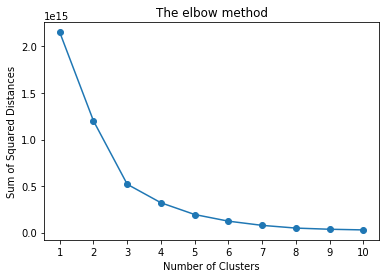

In [59]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


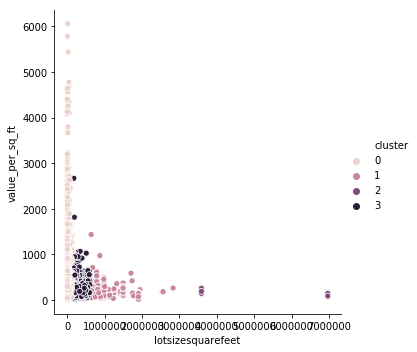

In [60]:
X = df[['lotsizesquarefeet', 'value_per_sq_ft']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='lotsizesquarefeet', y='value_per_sq_ft', hue='cluster')

### SPLIT DATA

In [71]:
train_df, test_df = train_test_split(df2, test_size = .30, random_state = 123)

train_df.head().T

,69610,72372,9643,15021,38156
parcelid,11244261,17300308,10759658,12013838,11993525
bathroomcnt,3,3,3,2,4
bedroomcnt,3,5,4,2,4
calculatedbathnbr,3,3,3,2,4
calculatedfinishedsquarefeet,1851,3760,2785,1320,2174
fips,6037.0,6111.0,6037.0,6037.0,6037.0
latitude,3.44347e+07,3.4207e+07,3.41423e+07,3.41001e+07,3.40768e+07
longitude,-1.17919e+08,-1.18688e+08,-1.18629e+08,-1.18345e+08,-1.18315e+08
lotsizesquarefeet,108542,56628,7904,0,8750
propertycountylandusecode,0100,1110,0100,010C,0100


In [72]:
#MIN/MAX SCALE
scaler = MinMaxScaler()
scaler.fit(train_df[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'value_per_sq_ft', 'lot_value_per_sq_ft']])

train_df[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'value_per_sq_ft', 'lot_value_per_sq_ft']] = scaler.transform(train_df[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'value_per_sq_ft', 'lot_value_per_sq_ft']])
test_df[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'value_per_sq_ft', 'lot_value_per_sq_ft']] = scaler.transform(test_df[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'value_per_sq_ft', 'lot_value_per_sq_ft']])

train_df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,rmcount,value_per_sq_ft,age_of_property,lot_value_per_sq_ft,cluster_target,cluster_location,0,1,2,3
69610,11244261,3.0,3.0,3.0,0.063002,6037.0,0.740334,0.810105,0.015570,0100,...,6.0,0.020285,50.0,0.000634,0,2,0,0,1,0
72372,17300308,3.0,5.0,3.0,0.152091,6111.0,0.586450,0.410003,0.008123,1110,...,8.0,0.054172,39.0,0.006629,0,0,1,0,0,0
9643,10759658,3.0,4.0,3.0,0.106590,6037.0,0.542674,0.440880,0.001134,0100,...,7.0,0.023547,40.0,0.015297,0,2,0,0,1,0
15021,12013838,2.0,2.0,2.0,0.038221,6037.0,0.514138,0.588563,0.000000,010C,...,4.0,0.080521,6.0,NaN,0,2,0,0,1,0
38156,11993525,4.0,4.0,4.0,0.078075,6037.0,0.498396,0.604030,0.001255,0100,...,8.0,0.100599,99.0,0.046084,0,3,0,0,0,1


### MODELING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#create
logit = LogisticRegression()
print(logit)

#fit
logit.fit(train_df[['cluster_location']], train_df.logerror)

#predict
print(logit.predict_proba(train_df[['cluster_location']]))

train_df['prediction']= logit.predict(train_df[['cluster_location']])

#evaluate
print(logit.score(train_df[['cluster_location']]))
cm = confusion_matrix(train_df.logerror, train_df.prediction)
print(cm)

print(classification_report(train_df.logerror, train_df.prediction))

print(train_df.logerror.value_counts())

print(train_df.prediction.value_counts())

print('Accuracy:', (train_df.logerror == train_df.prediction).sum() / train_df.shape[0])